**Although this dataset is for handwriting recognition, the instances are not images. the data in fact comes from an imperical study, utilizing a especial tablet to measure pen pressure in spaced time intervals and return the coordinates.**


---

## ✏️ **Handwritten Digit Dataset**

- **Source**: 250 digits from 44 writers, using a pressure-sensitive WACOM tablet.
- **Testing Strategy**: 30 writers for training and dependent testing, 14 for independent testing.
- **Data Used**: Only x and y coordinates—pressure data discarded.
- **Preprocessing**: Coordinate values normalized to remove scale and position differences.
- **Representation**:
  - Each digit is resampled spatially to 8 evenly spaced points through time.
  - Each point has 2 values (x and y), forming **16 features**.
  - The last feature is the class label, which is the digit written.
- **Feature Format**:
  - Either 8 x-values followed by 8 y-values, or
  - Alternating x and y coordinations (x1, y1, x2, y2, ..., x8, y8) depending on implementation.

---


## ***Task 3: Create a neural network by machine learning to read and detect handwriting data.***

In [ ]:
# # Essential setup: Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

## ***Downloading the Dataset***

In [2]:
import requests

# URLs for the dataset
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes"

# Download the files
response_train = requests.get(train_url)
response_test = requests.get(test_url)

# Save the files 
# IMPORTANT: to save to the Colab environment we must mount the drive first!

with open("pendigits.tra", "wb") as f:
    f.write(response_train.content)

with open("pendigits.tes", "wb") as f:
  f.write(response_test.content)

print("Dataset downloaded successfully!")

Dataset downloaded successfully!


## ***Loading and Parsing the Dataset***

In [3]:
import numpy as np

# Load training data
with open("pendigits.tra", "r") as f:
    train_data = f.readlines()

# Load test data
with open("pendigits.tes", "r") as f:
    test_data = f.readlines()

# Function to parse the data
def parse_data(data):
    X = []
    y = []
    for line in data:
        values = line.strip().split(',')
        X.append([float(x) for x in values[:-1]])
        y.append(int(values[-1]))
    return np.array(X), np.array(y)

# Parse training and test data
X_train, y_train = parse_data(train_data)
X_test, y_test = parse_data(test_data)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
     

Training data shape: (7494, 16)
Test data shape: (3498, 16)


In [6]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("pendigits.tra", header = None)
df_test = pd.read_csv("pendigits.tes", header = None)

In [7]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


In [8]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


### ***Separating classes and featurs***

In [9]:
X_temp = df_train.iloc[:,:16]
y_temp = df_train.iloc[:,16]
X_test = df_test.iloc[:,:16]
y_test = df_test.iloc[:,16]

In [10]:
X_test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92


In [11]:
y_test

0       8
1       8
2       8
3       9
4       9
       ..
3493    4
3494    2
3495    0
3496    0
3497    4
Name: 16, Length: 3498, dtype: int64

### ***Check out label distribution***

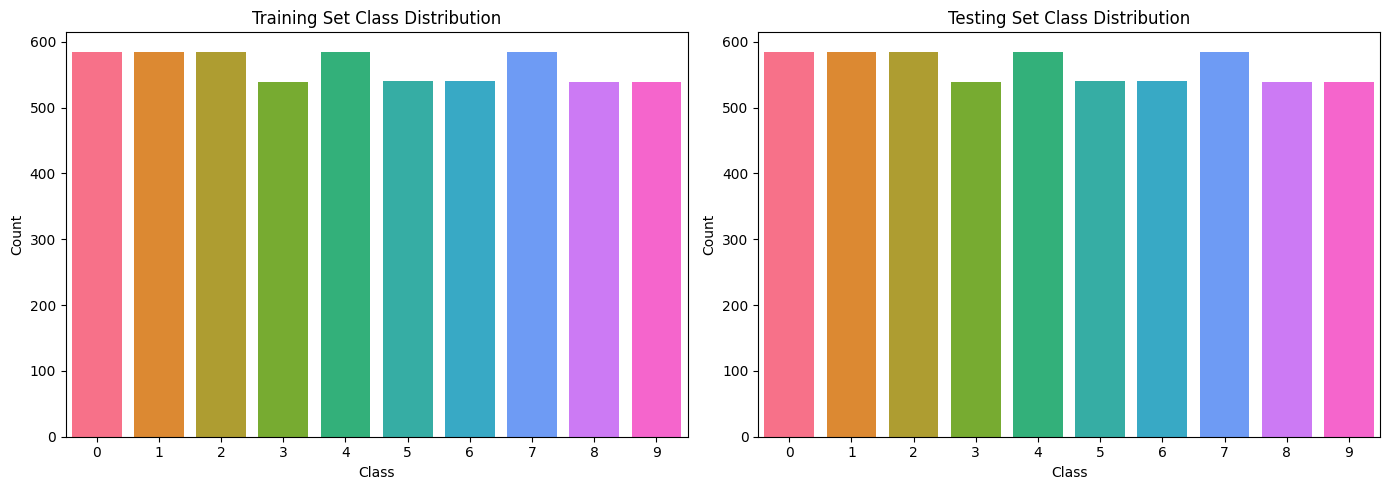

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette with enough colors
bar_colors = sns.color_palette("husl", len(set(y_train)))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sets = ["Training", "Testing"]

for i in [0,1]:
    # Plot distribution
    sns.countplot(x=y_train, ax=axes[i])
    axes[i].set_title(f"{sets[i]} Set Class Distribution")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Count")
    
    # Recolor bars individually
    for patch, color in zip(axes[i].patches, bar_colors):
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()

### ***Scaling the data***

In [57]:
from sklearn.preprocessing import MinMaxScaler
 
# Normalize features to [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## The result of fit_transform() is a NumPy array, not a DataFrame.
## Scaler converts the structure!

### ***Splitting validation set***

In [21]:
from sklearn.model_selection import train_test_split

# Split: train vs validation
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) 

In [29]:
print(f"Shape of X_train: {X_train.shape},  shape of y_train: {y_train.shape}")
print(f"Shape of X_valid: {X_valid.shape},  shape of y_valid: {y_valid.shape}")
print(f"Shape of X_test:  {X_test.shape},  shape of y_test:  {y_test.shape}")

Shape of X_train: (5620, 16),  shape of y_train: (5620,)
Shape of X_valid: (1874, 16),  shape of y_valid: (1874,)
Shape of X_test:  (3498, 16),  shape of y_test:  (3498,)


### ***The book's Neural Network Multilayer Perceptron from scratch***

In [62]:
import numpy as np
import sys

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.
    optimizer : str (default: 'sgd')
        Optimization algorithm to use. Options: 'sgd', 'momentum', 'adam'.

    Attributes
    -----------
    eval_ : dict
      Dictionary collecting the cost, training accuracy,
      and validation accuracy for each epoch during training.

    """
    def __init__(self, n_hidden=30,
                 l2=0., epochs=100, eta=0.001,
                 shuffle=True, minibatch_size=1, seed=None, optimizer='sgd'):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
        self.optimizer = optimizer
        n_features = X_train.shape[1]
        n_output=np.unique(y_train).shape[0]

        # Initialize optimizer-specific parameters
        if self.optimizer == 'momentum':
            self.momentum = 0.9
            self.delta_w_h_prev = np.zeros((n_features, self.n_hidden))
            self.delta_b_h_prev = np.zeros(self.n_hidden)
            self.delta_w_out_prev = np.zeros((self.n_hidden, n_output))
            self.delta_b_out_prev = np.zeros(n_output)
        elif self.optimizer == 'adam':
            self.beta1 = 0.9
            self.beta2 = 0.999
            self.epsilon = 1e-8
            self.m_w_h = np.zeros((n_features, self.n_hidden))
            self.v_w_h = np.zeros((n_features, self.n_hidden))
            self.m_b_h = np.zeros(self.n_hidden)
            self.v_b_h = np.zeros(self.n_hidden)
            self.m_w_out = np.zeros((self.n_hidden, n_output))
            self.v_w_out = np.zeros((self.n_hidden, n_output))
            self.m_b_out = np.zeros(n_output)
            self.v_b_out = np.zeros(n_output)

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation"""
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):
        """Compute forward propagation step"""
        z_h = np.dot(X, self.w_h) + self.b_h
        a_h = self._sigmoid(z_h)
        z_out = np.dot(a_h, self.w_out) + self.b_out
        a_out = self._sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Compute cost function."""
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) +
                    np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost

    def predict(self, X):
        """Predict class labels"""
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

        ########################
        # Grid Search CV
        ########################
        # Fot using GridSearchCV to find best hyperparameter values
    def get_params(self, deep=False):
        return {'n_hidden':self.n_hidden, 'l2':self.l2, 'epochs':self.epochs, 'eta':self.eta, 'shuffle':self.shuffle, 'minibatch_size':self.minibatch_size}
    
    def set_params(self, **Parameters):
        for parameter, value in Parameters.items():
            setattr(self, parameter, value)
        return self

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data."""
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ########################
        # Weight initialization
        ########################

        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))

        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # for progress formatting
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iterate over training epochs
        for i in range(self.epochs):

            # iterate over minibatches
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                delta_out = a_out - y_train_enc[batch_idx]
                sigmoid_derivative_h = a_h * (1. - a_h)
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # Regularization and weight updates
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # bias is not regularized

                if self.optimizer == 'sgd':
                    self.w_h -= self.eta * delta_w_h
                    self.b_h -= self.eta * delta_b_h
                    self.w_out -= self.eta * delta_w_out
                    self.b_out -= self.eta * delta_b_out

                elif self.optimizer == 'momentum':
                    self.delta_w_h_prev = self.momentum * self.delta_w_h_prev - self.eta * delta_w_h
                    self.delta_b_h_prev = self.momentum * self.delta_b_h_prev - self.eta * delta_b_h
                    self.w_h += self.delta_w_h_prev
                    self.b_h += self.delta_b_h_prev

                    self.delta_w_out_prev = self.momentum * self.delta_w_out_prev - self.eta * delta_w_out
                    self.delta_b_out_prev = self.momentum * self.delta_b_out_prev - self.eta * delta_b_out
                    self.w_out += self.delta_w_out_prev
                    self.b_out += self.delta_b_out_prev

                elif self.optimizer == 'adam':
                    self.m_w_h = self.beta1 * self.m_w_h + (1 - self.beta1) * delta_w_h
                    self.v_w_h = self.beta2 * self.v_w_h + (1 - self.beta2) * (delta_w_h ** 2)
                    m_w_h_hat = self.m_w_h / (1 - self.beta1 ** (i + 1))
                    v_w_h_hat = self.v_w_h / (1 - self.beta2 ** (i + 1))
                    self.w_h -= self.eta * m_w_h_hat / (np.sqrt(v_w_h_hat) + self.epsilon)

                    self.m_b_h = self.beta1 * self.m_b_h + (1 - self.beta1) * delta_b_h
                    self.v_b_h = self.beta2 * self.v_b_h + (1 - self.beta2) * (delta_b_h ** 2)
                    m_b_h_hat = self.m_b_h / (1 - self.beta1 ** (i + 1))
                    v_b_h_hat = self.v_b_h / (1 - self.beta2 ** (i + 1))
                    self.b_h -= self.eta * m_b_h_hat / (np.sqrt(v_b_h_hat) + self.epsilon)

                    self.m_w_out = self.beta1 * self.m_w_out + (1 - self.beta1) * delta_w_out
                    self.v_w_out = self.beta2 * self.v_w_out + (1 - self.beta2) * (delta_w_out ** 2)
                    m_w_out_hat = self.m_w_out / (1 - self.beta1 ** (i + 1))
                    v_w_out_hat = self.v_w_out / (1 - self.beta2 ** (i + 1))
                    self.w_out -= self.eta * m_w_out_hat / (np.sqrt(v_w_out_hat) + self.epsilon)

                    self.m_b_out = self.beta1 * self.m_b_out + (1 - self.beta1) * delta_b_out
                    self.v_b_out = self.beta2 * self.v_b_out + (1 - self.beta2) * (delta_b_out ** 2)
                    m_b_out_hat = self.m_b_out / (1 - self.beta1 ** (i + 1))
                    v_b_out_hat = self.v_b_out / (1 - self.beta2 ** (i + 1))
                    self.b_out -= self.eta * m_b_out_hat / (np.sqrt(v_b_out_hat) + self.epsilon)

            #############
            # Evaluation
            #############

            z_h, a_h, z_out, a_out = self._forward(X_train)

            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) /
                         X_valid.shape[0])

            sys.stderr.write('\rEpoch %0*d/%d | Cost: %.2f '
                             '| Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

### ***Straightforward train-test evaluation:***

- **Build a NeuralNetMLP with fixed hyperparameters.**

- **Train it on X_train, validate on X_valid.**

- **Evaluate final performance on X_test using accuracy_score.**

In [56]:
from sklearn.metrics import accuracy_score

# Initialize and train NeuralNetMLP
nn = NeuralNetMLP(n_hidden=50, epochs=200, eta=0.01, minibatch_size=10, shuffle=True, seed=42)
nn.fit(X_train, y_train, X_valid, y_valid)

# Make predictions
y_pred = nn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

Epoch 200/200 | Cost: 310.37 | Train/Valid Acc.: 99.57%/76.15%   


Test Accuracy: 97.11%


### ***Hyperparameter Tuning with Systematic Grid Search***

- **Define a grid of hyperparameter options.**

- **Use GridSearchCV with RepeatedKFold to perform repeated cross-validation.**

- **Find the best model (bestModel) based on scoring (neg_mean_squared_error).**

- **Print the best parameters and score.**

In [66]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

model = NeuralNetMLP()
n_hidden=[1, 10, 100]
l2=[0.1, 0.01]
epochs=[100, 200]
eta=[0.0005, 0.001]
minibatch_size=[100]
shuffle=[True]


grid = dict(n_hidden=n_hidden, l2=l2, epochs=epochs, eta=eta, minibatch_size=minibatch_size, shuffle=shuffle)

print("[INFO] grid searching over the hyperparameters...")
kfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=kfold, scoring="neg_mean_squared_error")

# fitting to the search results
grid_search.fit(X_train, y_train, X_valid=X_valid, y_valid=y_valid)

# extract the best model
print("[INFO] evaluating...")
best_model = grid_search.best_estimator_

# Best parameters and performance
print("Best Parameters:\n", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Get accuracy score:
best_model.fit(X_train, y_train, X_valid, y_valid)
y_pred = best_model.predict(X_test)
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

[INFO] grid searching over the hyperparameters...


Epoch 200/200 | Cost: 2577.18 | Train/Valid Acc.: 94.29%/88.42%  

[INFO] evaluating...
Best Parameters:
 {'epochs': 200, 'eta': 0.001, 'l2': 0.01, 'minibatch_size': 100, 'n_hidden': 100, 'shuffle': True}
Best Cross-Validation Score: -1.2898576512455515


Epoch 200/200 | Cost: 2551.19 | Train/Valid Acc.: 94.66%/85.81%  

Final Test Accuracy: 0.8970840480274442


### ***Plotting a Confusion Matrix***

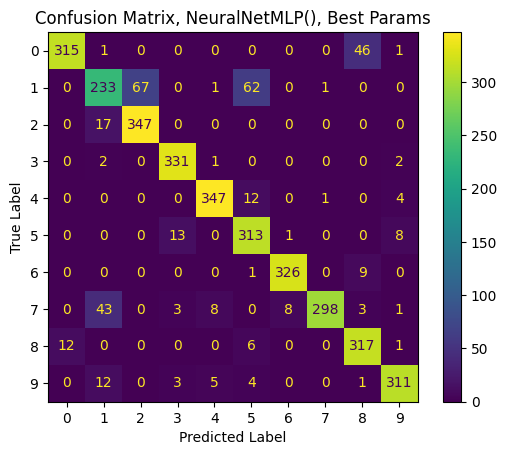

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot it
disp.plot()
plt.title("Confusion Matrix, NeuralNetMLP(), Best Params")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### ***Scikit Learn Built-in MLPClassifier***

sklearn.neural_network.MLPClassifier accuracy score with activation tanh: 0.9708


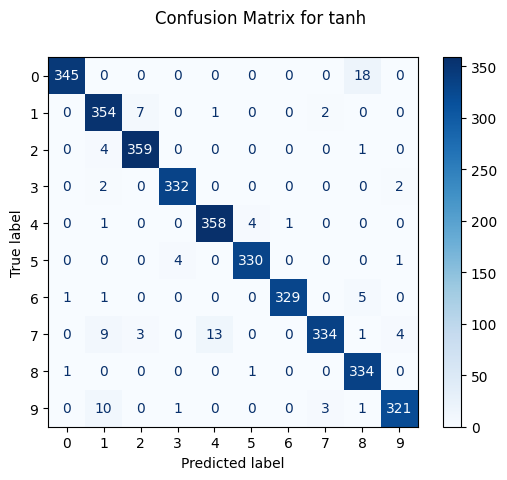

sklearn.neural_network.MLPClassifier accuracy score with activation relu: 0.9697


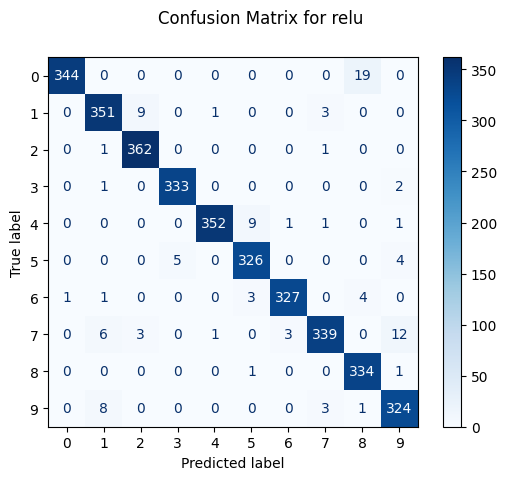

sklearn.neural_network.MLPClassifier accuracy score with activation identity: 0.9251


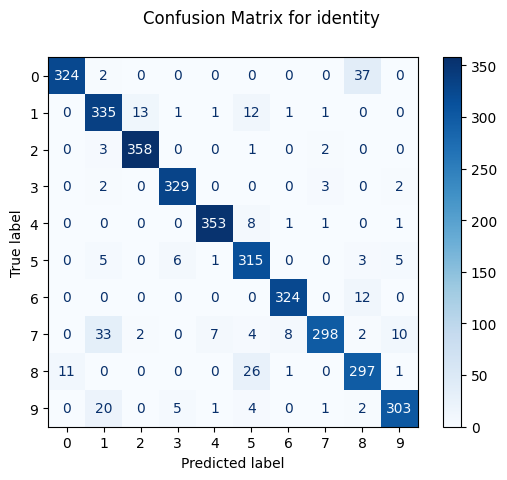

sklearn.neural_network.MLPClassifier accuracy score with activation logistic: 0.9648


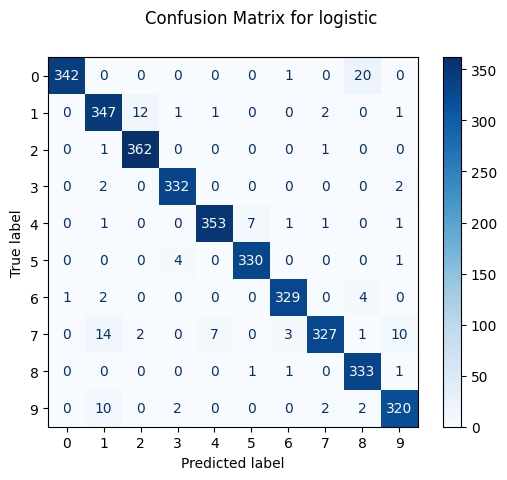

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def MLP(X_train, X_test, y_train, y_test):
    # try different activation functions
    activation_list = ["tanh", "relu", "identity", "logistic"]
    for activation in activation_list:
        mlp_clf = MLPClassifier(max_iter=1000, activation=activation).fit(X_train, y_train)
        y_pred_mlp = mlp_clf.predict(X_test)
        accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
        # accuracy score
        print(f"sklearn.neural_network.MLPClassifier accuracy score with activation {activation}: {accuracy_mlp:.4f}")

        # Plotting
        fig, ax = plt.subplots()
        ConfusionMatrixDisplay.from_estimator(
            mlp_clf,
            X_test,
            y_test,
            display_labels=mlp_clf.classes_,
            ax=ax,
            cmap=plt.cm.Blues,
            values_format='d'
        )
        fig.suptitle(f"Confusion Matrix for {activation}")
        plt.show()


MLP(X_train, X_test, y_train, y_test)